In [95]:
%matplotlib inline
from matplotlib import pyplot as plt
import skimage.io as io
import sys
import random
import numpy as np
sys.path.append("./coco/PythonAPI")
from pycocotools.coco import COCO
from pycocotools import mask

def mtx_plot(fnmtx, ratio):
    h = len(fnmtx[0])
    w = len(fnmtx)
    k = 1
    fig = plt.figure(figsize=(ratio[0]*h, ratio[1]*w))
    for fnarr in fnmtx:
        for fn in fnarr:
            fig.add_subplot(w,h,k)
            fn(k)
            k += 1

In [ ]:
coco = COCO("./annotations/instances_train2014.json")

In [12]:
catIds = coco.getCatIds() # type: List[int]
cats = coco.loadCats(catIds) # type: List[dict]
print(cats[0])
catNames = [cat['name'] for cat in cats] # type: List[str]
print("catNames:", catNames)
superCatNames = list(set([cat['supercategory'] for cat in cats])) # type: List[str]
print("superCatNames:", superCatNames)


{'supercategory': 'person', 'name': 'person', 'id': 1}
catNames: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
superCatNames: ['outdoor', 'animal', 'electronic', 'appliance', 'kitchen'

In [61]:
imgIds = coco.getImgIds(catIds=coco.getCatIds(catNms=['person'])) # type: List[int]
imgInfos = coco.loadImgs(imgIds)
print("info:", imgInfos[0])
imgs = ((imgInfo, data_aug(imgInfo)) for imgInfo in imgInfos) # type: Iterator[Tuple[dict, np.ndarray]]
length = len(imgInfos) # type: int
print(imgs, length)

info: {'license': 2, 'file_name': 'COCO_train2014_000000262145.jpg', 'date_captured': '2013-11-20 02:07:55', 'coco_url': 'http://mscoco.org/images/262145', 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg', 'id': 262145, 'width': 640, 'height': 427}
<generator object <genexpr> at 0x127797d58> 45174


In [62]:
def data_aug(imgInfo: dict) -> np.ndarray :
    img = io.imread(imgInfo['coco_url'])
    return img

80
COCO_train2014_000000131373.jpg (427, 640, 3) uint8
['horse'] 19
['person'] 1
COCO_train2014_000000131374.jpg (294, 500, 3) uint8
['umbrella'] 28
['chair'] 62
['chair'] 62
['chair'] 62
['chair'] 62
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['person'] 1
['bench'] 15
['bottle'] 44
['bottle'] 44
['bottle'] 44
['bottle'] 44
['bottle'] 44
['chair'] 62
['person'] 1
['umbrella'] 28
['umbrella'] 28
['umbrella'] 28
['bottle'] 44
['bottle'] 44
['chair'] 62
['chair'] 62
['chair'] 62
['person'] 1
['chair'] 62
['chair'] 62
COCO_train2014_000000131376.jpg (640, 429, 3) uint8
['person'] 1
['skateboard'] 41


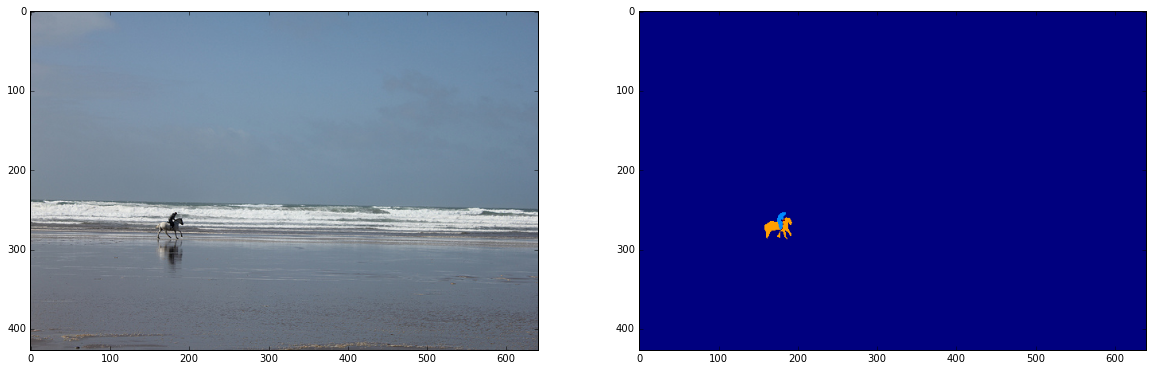

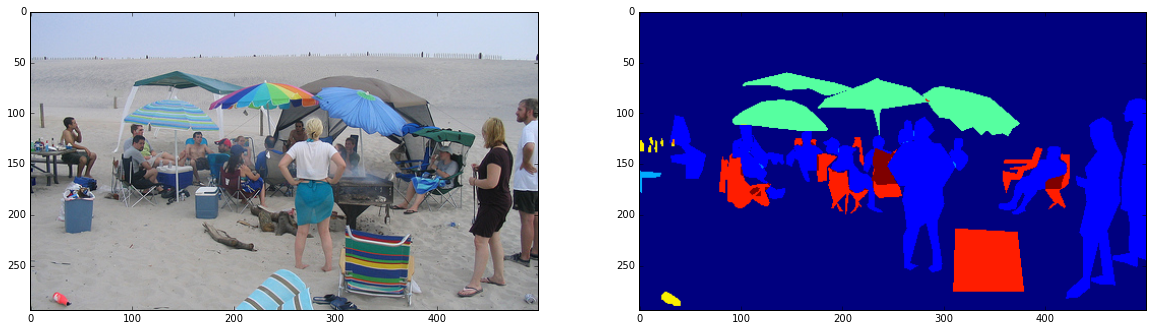

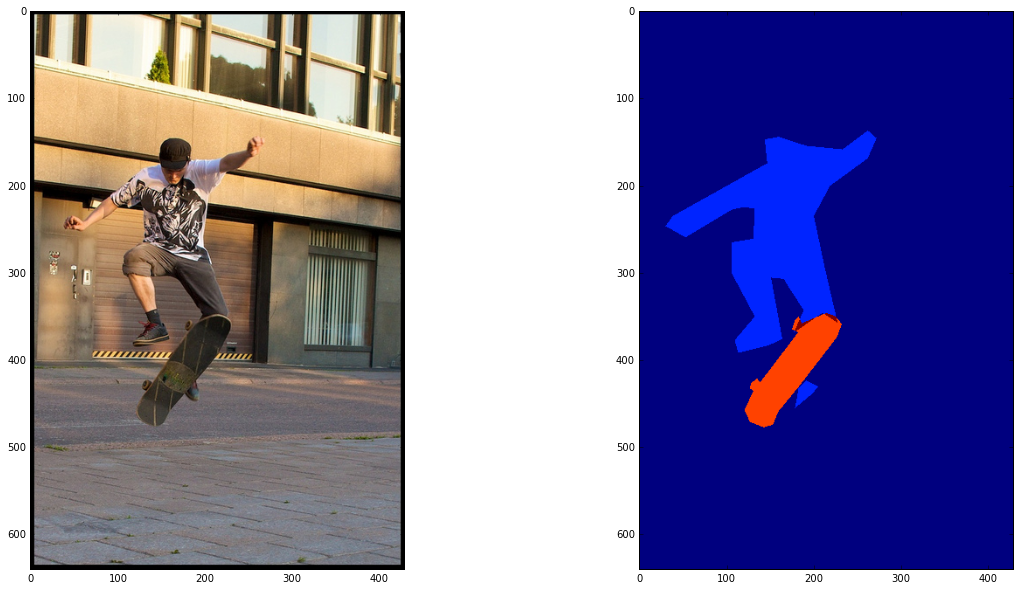

In [132]:
cats_num = len([cat['name'] for cat in coco.loadCats(coco.getCatIds())])
print(cats_num)

for (_, (info, img)) in zip(range(3), imgs):
    print(info["file_name"], img.shape, img.dtype)
    anns = coco.loadAnns(coco.getAnnIds(imgIds=[info['id']],iscrowd=False)) # type: List[dict]
    mask_all = np.zeros((img.shape[0], img.shape[1]), np.uint8)
    for ann in anns:
        print([cat["name" ] for cat in coco.loadCats([ann["category_id"]])], ann["category_id"])
        rles = mask.frPyObjects(ann["segmentation"], img.shape[0], img.shape[1]) # type: List[dict]
        for i, rle in enumerate(rles):
            mask_img = mask.decode(rle) # type: np.ndarray
            mask_all += mask_img * int(255/cats_num * (ann["category_id"]*0.9 + cats_num*0.1))
    mtx_plot([[lambda x: plt.imshow(img), lambda x: plt.imshow(mask_all)]], (10, 10))